In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("price_data.csv")

In [3]:
df.head()

,baseFare,reservationCharge,superfastCharge,fuelAmount,totalConcession,tatkalFare,serviceTax,otherCharge,cateringCharge,dynamicFare,totalFare,availability,trainNumber,timeStamp,fromStnCode,toStnCode,classCode,distance,duration
0,1059,60,0,0.0,0,0,56.0,0,0,0,1175,"[{'date': '2-12-2023', 'status': 'AVAILABLE-00...",11464,2023-10-03 22:13:07.781307,JBP,SRID,1A,54,33.0
1,626,50,0,0.0,0,0,34.0,0,0,0,710,"[{'date': '2-12-2023', 'status': 'AVAILABLE-00...",11464,2023-10-03 22:13:07.781307,JBP,SRID,2A,54,33.0
2,441,40,0,0.0,0,0,24.0,0,0,0,505,"[{'date': '2-12-2023', 'status': 'AVAILABLE-01...",11464,2023-10-03 22:13:07.781307,JBP,SRID,3A,54,33.0
3,125,20,0,0.0,0,0,0.0,0,0,0,145,"[{'date': '2-12-2023', 'status': 'AVAILABLE-00...",11464,2023-10-03 22:13:07.781307,JBP,SRID,SL,54,33.0
4,1059,60,0,0.0,0,0,56.0,0,0,0,1175,"[{'date': '2-12-2023', 'status': 'AVAILABLE-00...",11464,2023-10-03 22:13:07.781307,JBP,KKB,1A,69,49.0


## Basic information of this dataset 

In [4]:
df.shape

(326643, 19)

In [5]:
df.columns

Index(['baseFare', 'reservationCharge', 'superfastCharge', 'fuelAmount',
       'totalConcession', 'tatkalFare', 'serviceTax', 'otherCharge',
       'cateringCharge', 'dynamicFare', 'totalFare', 'availability',
       'trainNumber', 'timeStamp', 'fromStnCode', 'toStnCode', 'classCode',
       'distance', 'duration'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326643 entries, 0 to 326642
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   baseFare           326643 non-null  int64  
 1   reservationCharge  326643 non-null  int64  
 2   superfastCharge    326643 non-null  int64  
 3   fuelAmount         326643 non-null  float64
 4   totalConcession    326643 non-null  int64  
 5   tatkalFare         326643 non-null  int64  
 6   serviceTax         326643 non-null  float64
 7   otherCharge        326643 non-null  int64  
 8   cateringCharge     326643 non-null  int64  
 9   dynamicFare        326643 non-null  int64  
 10  totalFare          326643 non-null  int64  
 11  availability       326643 non-null  object 
 12  trainNumber        326643 non-null  int64  
 13  timeStamp          326643 non-null  object 
 14  fromStnCode        326643 non-null  object 
 15  toStnCode          326643 non-null  object 
 16  cl

In [7]:
df.isnull().sum()

baseFare             0
reservationCharge    0
superfastCharge      0
fuelAmount           0
totalConcession      0
tatkalFare           0
serviceTax           0
otherCharge          0
cateringCharge       0
dynamicFare          0
totalFare            0
availability         0
trainNumber          0
timeStamp            0
fromStnCode          0
toStnCode            0
classCode            0
distance             0
duration             0
dtype: int64

In [8]:
df.duplicated().sum()

0

### Insights

* 18 independent feature and 1 dependent feature  
* There are 5 categorical and 13 numerica feature in the independet feature and the  1 dependent  is numeric feature
* There are no null value and no duplicate value present in this data set






## EDA 

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseFare,326643.0,890.075122,793.765711,30.0,362.0,626.0,1222.0,6541.0
reservationCharge,326643.0,38.157805,14.324952,15.0,20.0,40.0,50.0,60.0
superfastCharge,326643.0,20.058091,24.646072,0.0,0.0,0.0,45.0,75.0
fuelAmount,326643.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
totalConcession,326643.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
tatkalFare,326643.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
serviceTax,326643.0,42.761510,45.080793,0.0,0.0,34.0,65.0,334.0
otherCharge,326643.0,0.053208,1.018403,0.0,0.0,0.0,0.0,25.0
cateringCharge,326643.0,4.990601,42.586032,0.0,0.0,0.0,0.0,1365.0
dynamicFare,326643.0,4.224771,49.050982,0.0,0.0,0.0,0.0,1518.0


* Here I saw that this ['fuelAmount','totalConcession','tatkalFare'] features has no contribution of this dataset I drop this feature

In [10]:
drop_ele=['fuelAmount','totalConcession','tatkalFare','timeStamp','availability']
df.drop(drop_ele,axis=1,inplace=True)

In [11]:
df.shape

(326643, 14)

In [12]:
#separate numerical columns and categorical columns 

## Univariant EDA 

### Univariant Numericl feature analysis 

Text(0.5, 0, 'BASEFARE')

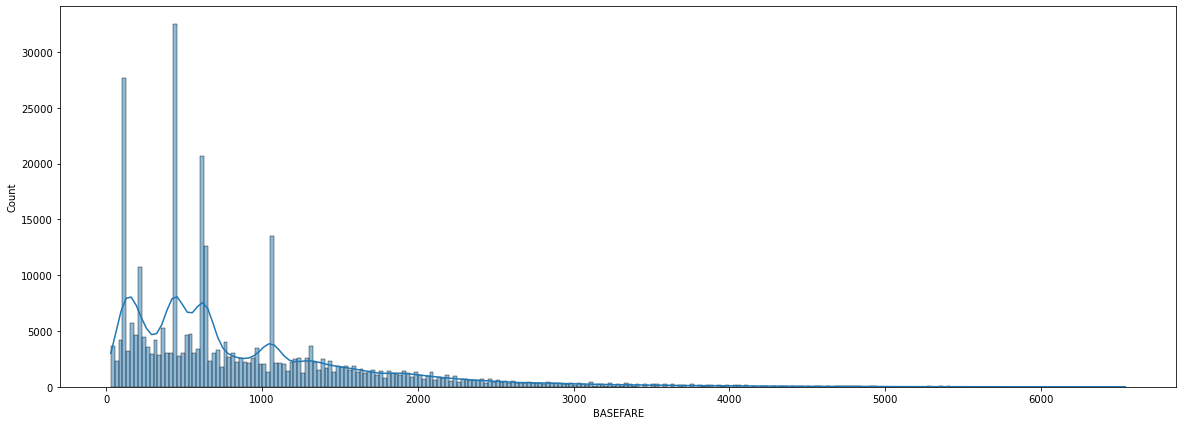

In [56]:
plt.figure(figsize=(20,7))
sns.histplot(x=df['baseFare'],data=df,kde=True)
plt.xlabel('BASEFARE')


Text(0.5, 0, 'BASEFARE')

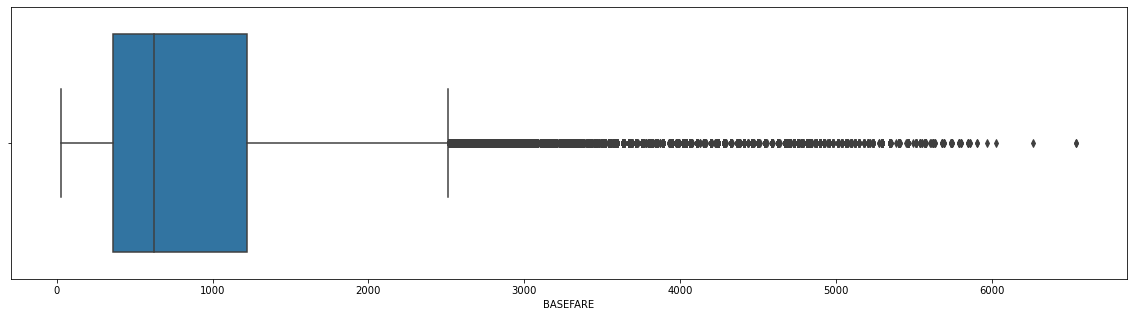

In [57]:
plt.figure(figsize=(20,5))
sns.boxplot(x=df['baseFare'],data=df)
plt.xlabel('BASEFARE')


* this two plot help me to understand that majority traveller pay under 2000 INR very less number of people pay greater then 2000 INR
* this variation occurs because of traveller  travels from the various class
* outlier also present 

Text(0.5, 0, 'RESERVATION CHARGE')

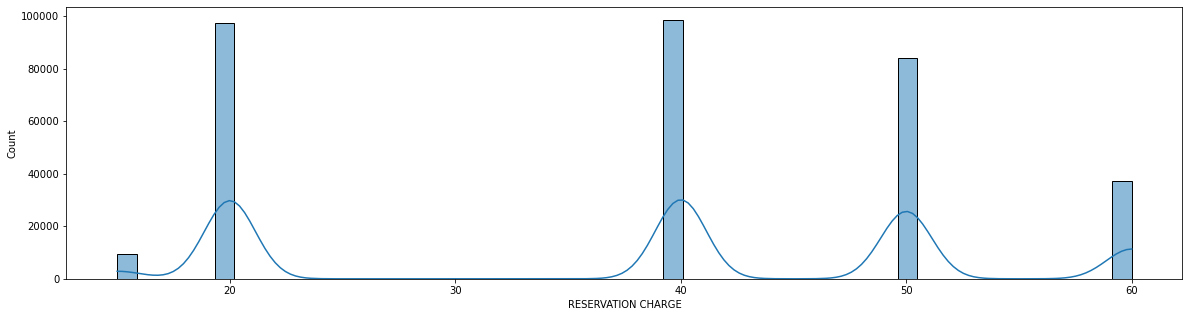

In [58]:
plt.figure(figsize=(20,5))
sns.histplot(x=df['reservationCharge'],data=df,kde=True)
plt.xlabel('RESERVATION CHARGE')


* Almots 95000+ traveller pay 20 INR and 40 INR 
* And very less number of traveller pay around the range of (10-15) INR
* This plot look like uniform distribution

Text(0.5, 0, 'superfastCharge')

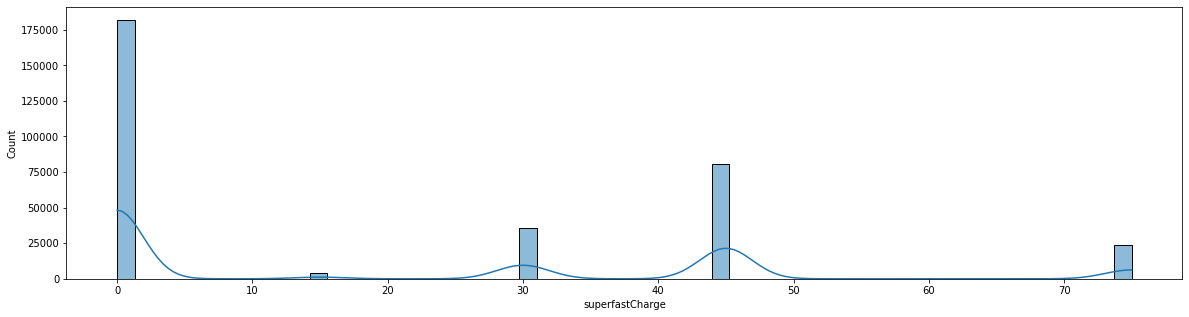

In [16]:
plt.figure(figsize=(20,5))
sns.histplot(x=df['superfastCharge'],data=df,kde=True)
plt.xlabel('superfastCharge')

*  Almost above 50% traveller does not pay any kind of superfast_charge  

Text(0.5, 0, 'serviceTax')

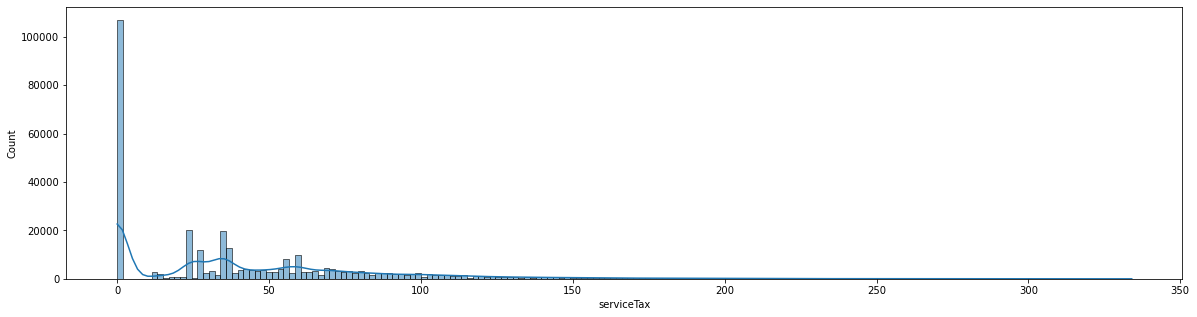

In [17]:
plt.figure(figsize=(20,5))
sns.histplot(x=df['serviceTax'],data=df,kde=True)
plt.xlabel('serviceTax')

Text(0.5, 0, 'serviceTax')

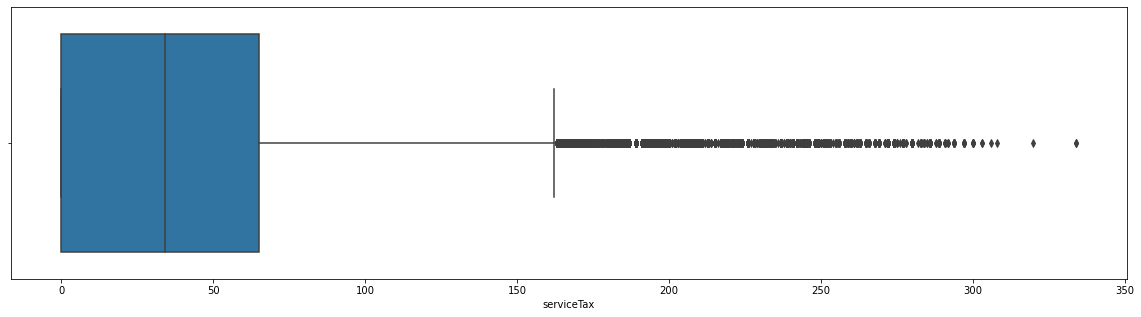

In [18]:
plt.figure(figsize=(20,5))
sns.boxplot(x=df['serviceTax'],data=df)
plt.xlabel("serviceTax")

* Majority traveller pay their servicetax is 0
* outlier present
* right skew data, we apply here column transform [log transform]

Text(0.5, 0, 'distance')

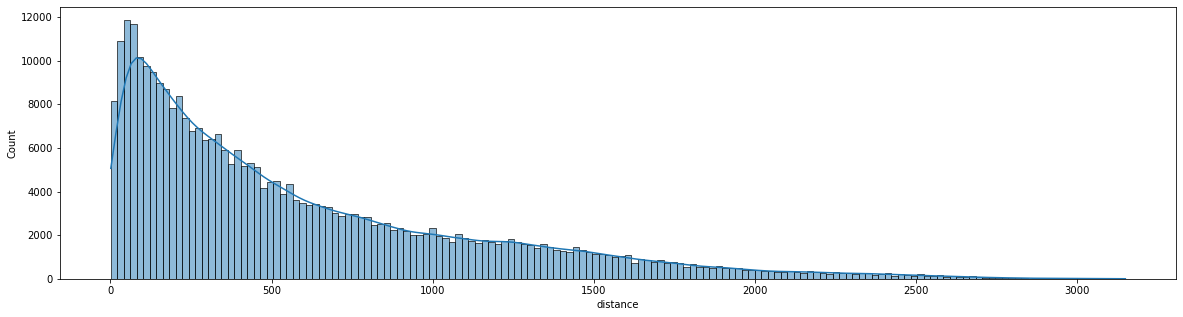

In [19]:
plt.figure(figsize=(20,5))
sns.histplot(x=df['distance'],data=df,kde=True)
plt.xlabel('distance')

Text(0.5, 0, 'distance')

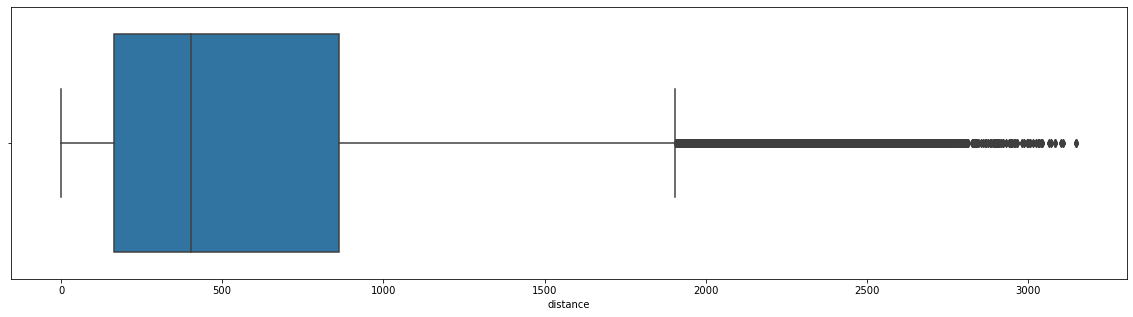

In [20]:
plt.figure(figsize=(20,5))
sns.boxplot(x=df['distance'],data=df)
plt.xlabel("distance")

In [60]:
df['distance'].skew()

1.3124227537517787

* right skew data and outlier also present we apply here column transform [log transform]

Text(0.5, 0, 'duration')

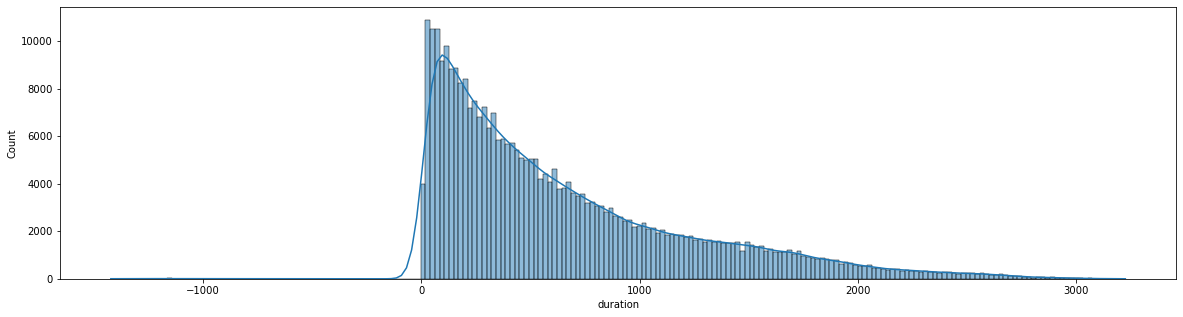

In [21]:
plt.figure(figsize=(20,5))
sns.histplot(x=df['duration'],data=df,kde=True)
plt.xlabel('duration')

Text(0.5, 0, 'duration')

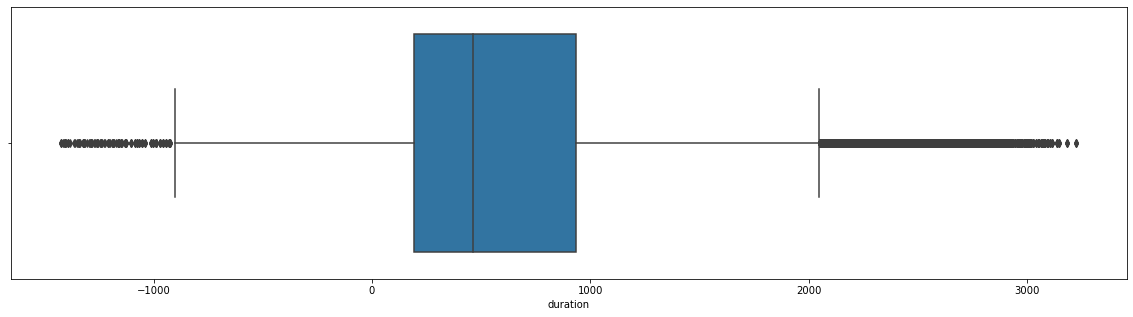

In [22]:
plt.figure(figsize=(20,5))
sns.boxplot(x=df['duration'],data=df)
plt.xlabel("duration")

* outlier present 
* lots of value is negative but cannot be possible so we replace it

### Univariant categorical feature analysis 

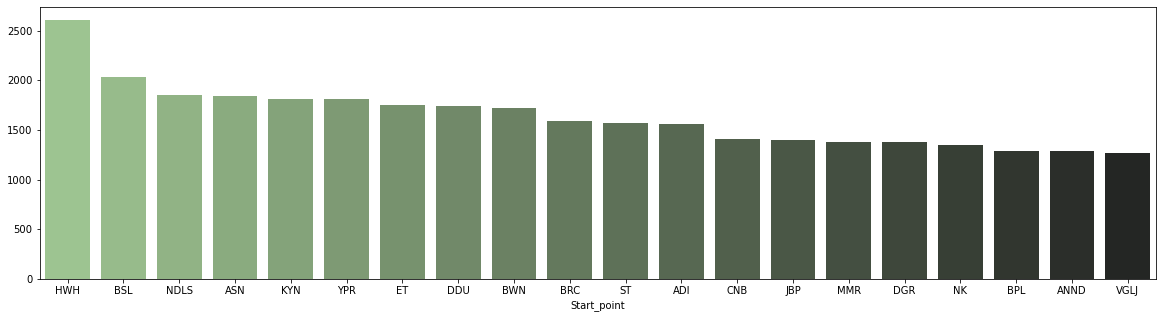

In [23]:
start_point_=df['fromStnCode'].value_counts()

def start_point(x):
    plt.figure(figsize=(20,5))
    top_value=start_point_.head(x)
    sns.barplot(x=top_value.index,y=top_value.values,data=df,palette='dark:#9C8_r')
    plt.xlabel("Start_point")
    return
start_point(20)

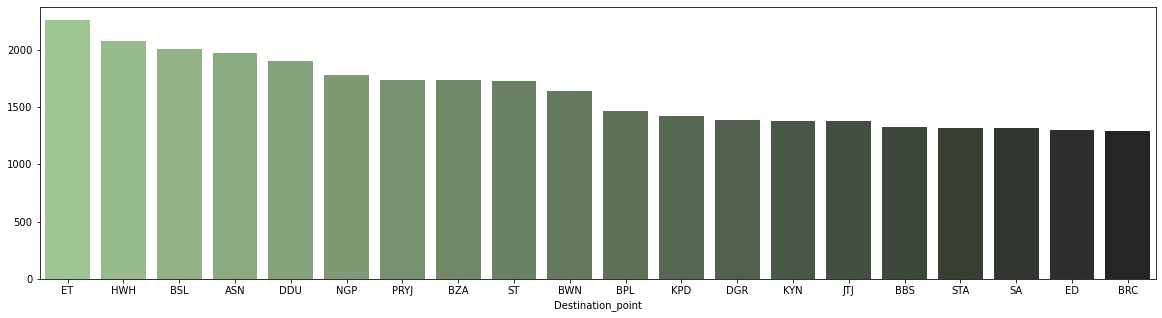

In [24]:
destination=df['toStnCode'].value_counts()

def destination_(x):
    plt.figure(figsize=(20,5))
    top_value=destination.head(x)
    sns.barplot(x=top_value.index,y=top_value.values,data=df,palette='dark:#9C8_r')
    plt.xlabel("Destination_point")
    return
destination_(20)

Text(0.5, 0, 'Classwise traveller')

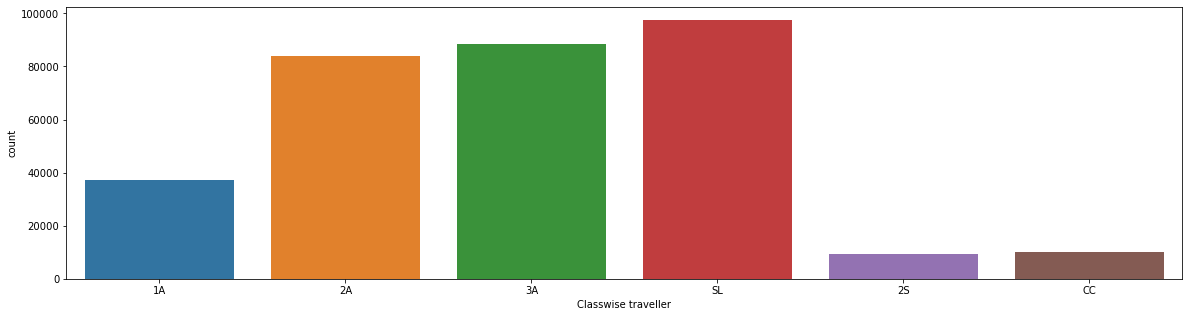

In [25]:

plt.figure(figsize=(20,5))
sns.countplot(x=df['classCode'],data=df)
plt.xlabel("Classwise traveller")


* Majority traveller travel is slepper class 

## Bivariant analysis 

Text(0.5, 0, 'distance')

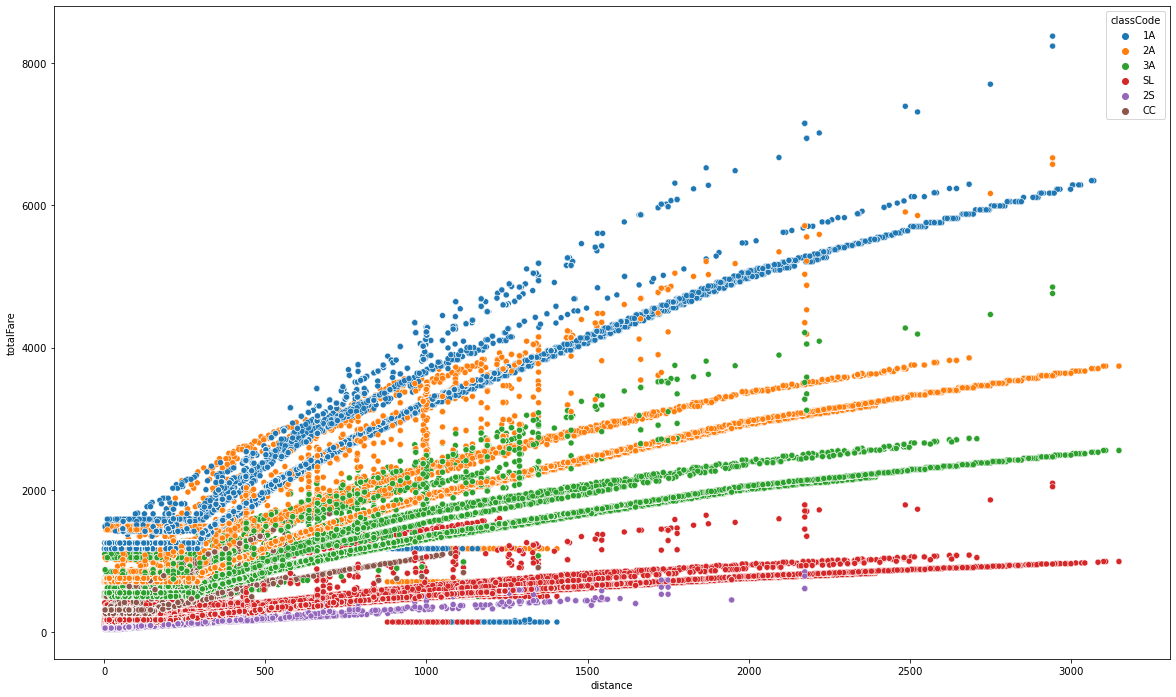

In [26]:
plt.figure(figsize=(20,12))
sns.scatterplot(x=df['distance'],y=df['totalFare'],data=df,hue=df['classCode'])
plt.xlabel("distance")

 * this bivariant plot shows that total fare and distance is highly positive corelated  

Text(0.5, 0, 'abc')

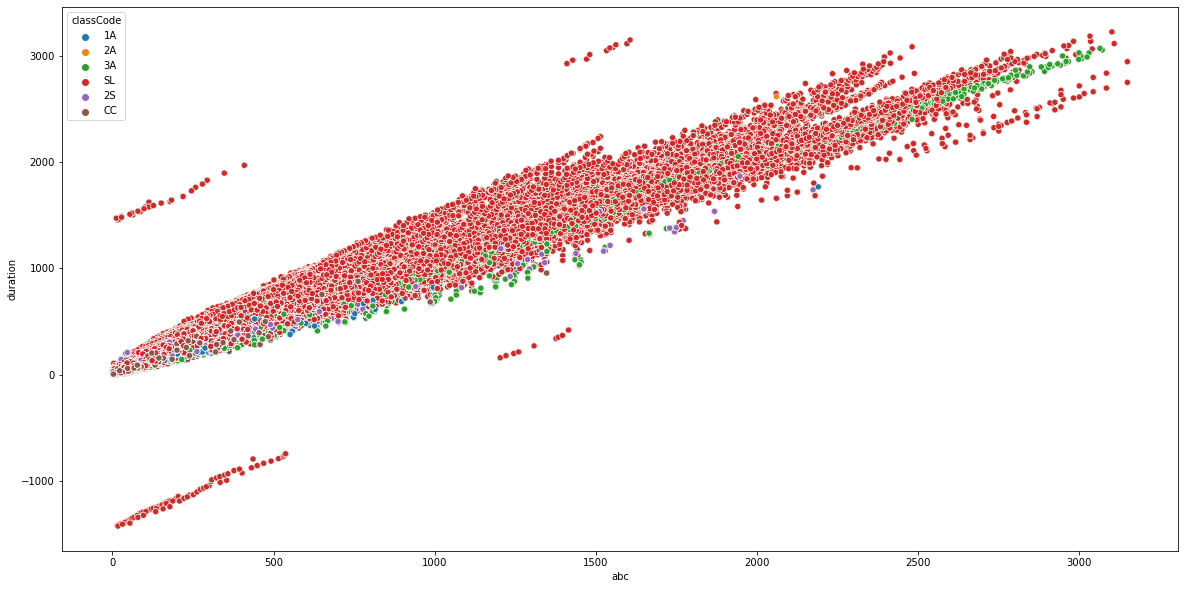

In [27]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=df['distance'],y=df['duration'],data=df,hue=df['classCode'])
plt.Ylabel("DURATION")
plt.xlabel("DISTA")

In [28]:
df.corr()

,baseFare,reservationCharge,superfastCharge,serviceTax,otherCharge,cateringCharge,dynamicFare,totalFare,trainNumber,distance,duration
baseFare,1.000000,0.673303,0.390930,0.977310,0.075733,0.164796,0.067645,0.994863,0.005852,0.650017,0.624673
reservationCharge,0.673303,1.000000,0.356367,0.766696,0.003403,0.085607,0.036815,0.685292,0.065096,0.077533,0.064718
superfastCharge,0.390930,0.356367,1.000000,0.411748,-0.042521,0.167257,0.083361,0.424102,0.150937,0.186578,0.098778
serviceTax,0.977310,0.766696,0.411748,1.000000,0.058940,0.186007,0.122862,0.981640,0.017397,0.526907,0.499302
otherCharge,0.075733,0.003403,-0.042521,0.058940,1.000000,-0.006123,-0.004500,0.071453,-0.142707,0.105292,0.119933
cateringCharge,0.164796,0.085607,0.167257,0.186007,-0.006123,1.000000,0.480724,0.241791,-0.017041,0.071850,0.014006
dynamicFare,0.067645,0.036815,0.083361,0.122862,-0.004500,0.480724,1.000000,0.150815,-0.023305,0.053865,0.009756
totalFare,0.994863,0.685292,0.424102,0.981640,0.071453,0.241791,0.150815,1.000000,0.009239,0.632152,0.599659
trainNumber,0.005852,0.065096,0.150937,0.017397,-0.142707,-0.017041,-0.023305,0.009239,1.000000,0.041267,0.028568
distance,0.650017,0.077533,0.186578,0.526907,0.105292,0.071850,0.053865,0.632152,0.041267,1.000000,0.981119


In [29]:
corr = df.corr()
target_corr = corr['totalFare'].drop('totalFare')
target_corr

baseFare             0.994863
reservationCharge    0.685292
superfastCharge      0.424102
serviceTax           0.981640
otherCharge          0.071453
cateringCharge       0.241791
dynamicFare          0.150815
trainNumber          0.009239
distance             0.632152
duration             0.599659
Name: totalFare, dtype: float64

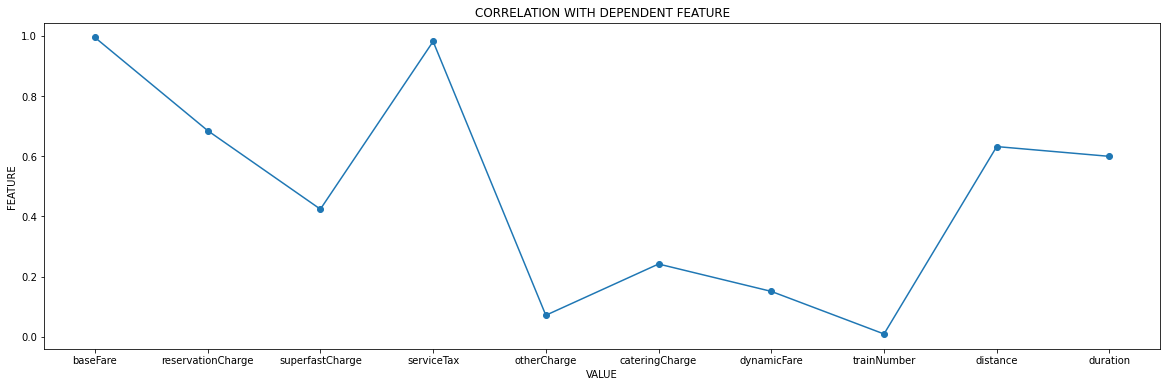

In [30]:
plt.figure(figsize=(20, 6))
plt.plot(target_corr, marker='o', linestyle='-')
plt.title("CORRELATION WITH DEPENDENT FEATURE")
plt.xlabel("VALUE")
plt.ylabel("FEATURE")
plt.show()


Text(159.0, 0.5, 'FEATURE')

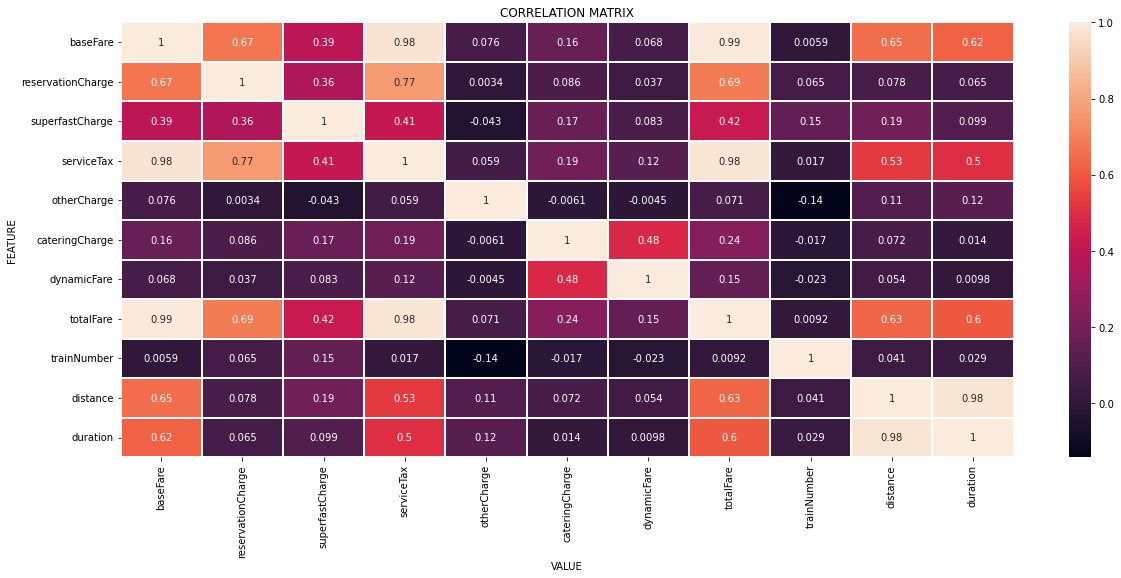

In [31]:
plt.figure(figsize=(20,8))
sns.heatmap(data=df.corr(),annot=True,linewidth=1.5)
plt.title("CORRELATION MATRIX")
plt.xlabel("VALUE")
plt.ylabel("FEATURE")

Text(0.5, 1.0, 'PAIRPLOT WITH ALL FEATURE')

<Figure size 1440x576 with 0 Axes>

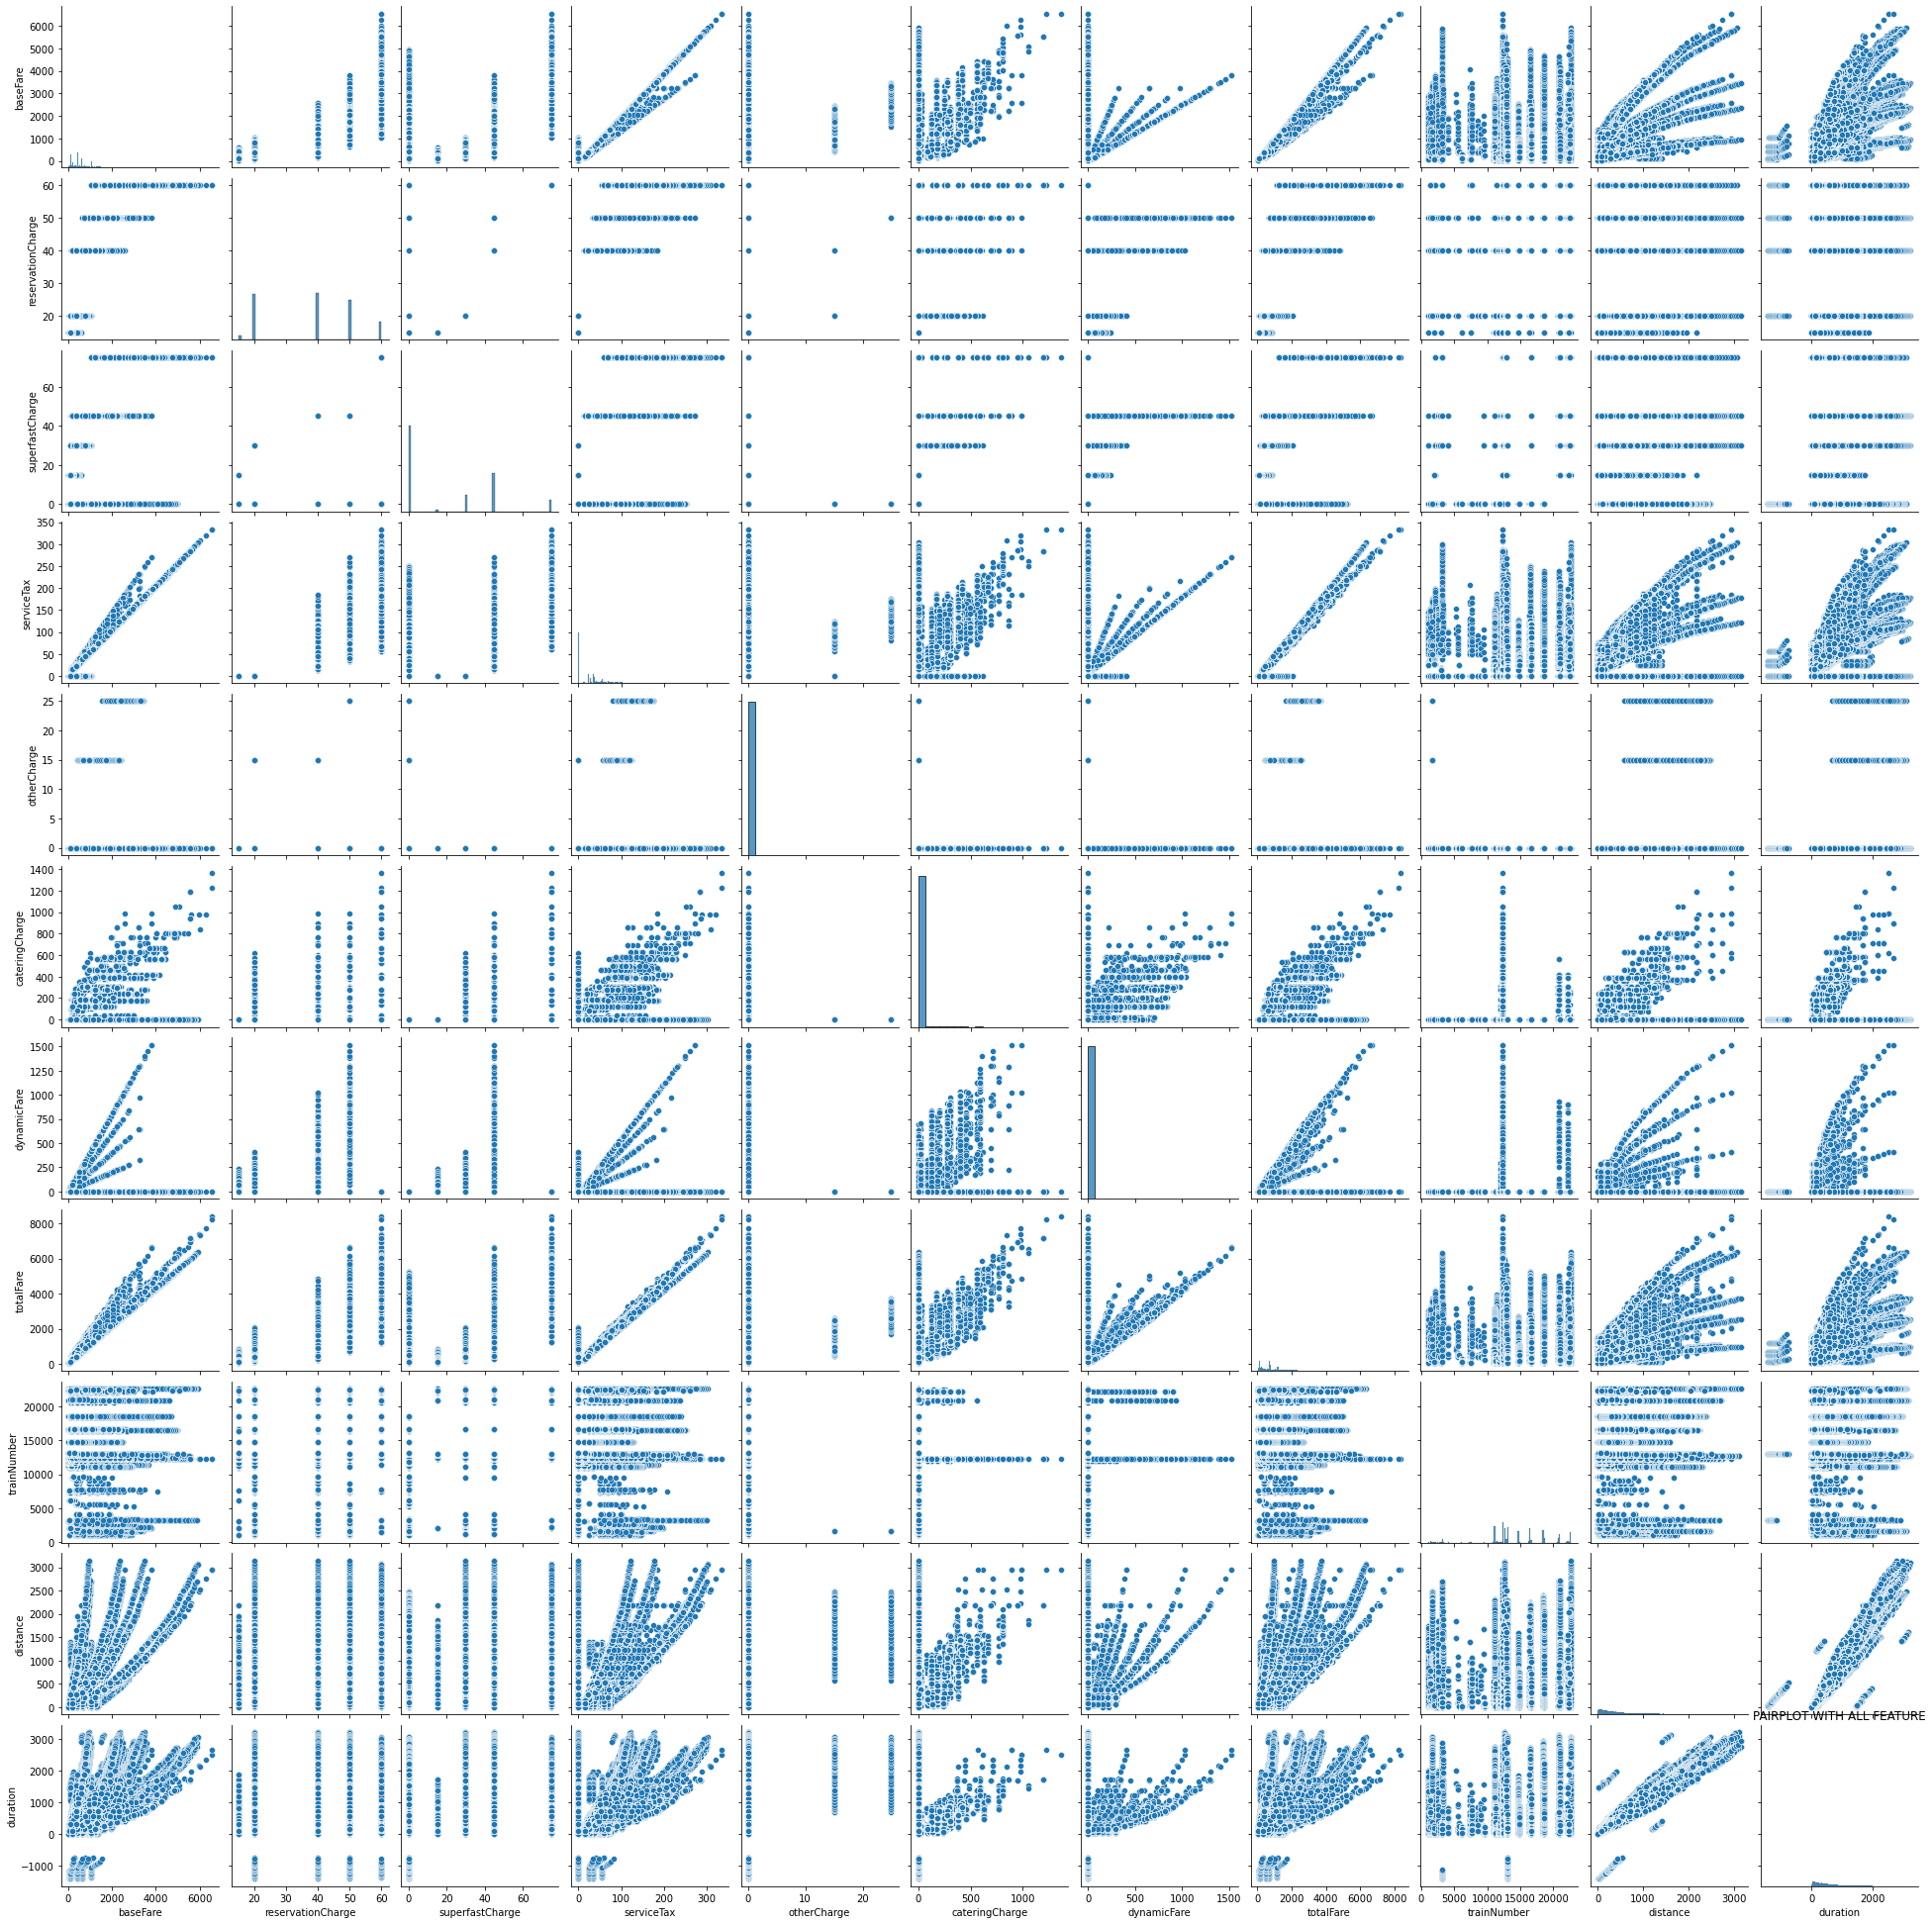

In [32]:
plt.figure(figsize=(20,8))
sns.pairplot(data=df)
plt.title("PAIRPLOT WITH ALL FEATURE")
